Use your quandl account to down load the historical price series for 
    
    AMZN
    XOM

You should retrieve at least 2 years worth of daily [open, high, low, close, adj_close] series for each of these stocks.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl

quandl.ApiConfig.api_key = 'YxoLj8ezeNxXnnB4-oKX'
data = quandl.get_table('WIKI/PRICES', 
                        qopts = { 'columns': ['date', 'ticker', 'open','high','low','close','adj_close'] }, 
                        ticker = ['AMZN','XOM'], 
                        date = { 'gte': '2016-01-01', 'lte': '2018-03-27' })
data = data.set_index('date')
data = data.sort_index()
data.head()

,ticker,open,high,low,close,adj_close
date,,,,,,
2016-01-04,XOM,77.50,77.940,76.4550,77.46,72.070110
2016-01-04,AMZN,656.29,657.715,627.5100,636.99,636.990000
2016-01-05,AMZN,646.86,646.910,627.6500,633.79,633.790000
2016-01-05,XOM,77.19,78.140,76.9223,78.12,72.684185
2016-01-06,XOM,76.64,77.640,76.5900,77.47,72.079414


### Part I

Resample your time series in monthly frequency to get the corresponding **monthly** [open, high, low, close, adj_close] time series (you would need to resample with **different resample functions** based on if it's open, high, low, or close time series)

In [8]:
XOM = data[data['ticker']=='XOM']
AMZN = data[data['ticker']=='AMZN']
M_XOM = XOM.resample('M').agg({'open':'first', 'high':'max', 
                               'low': 'min', 'close':'last',
                               'adj_close':'last'})
M_AMZN = AMZN.resample('M').agg({'open':'first', 'high':'max', 
                               'low': 'min', 'close':'last',
                               'adj_close':'last'})
M_XOM.insert(0,'ticker','XOM')
M_AMZN.insert(0,'ticker','AMZN')
price = pd.concat([M_XOM,M_AMZN])
price.head()

,ticker,open,high,low,close,adj_close
date,,,,,,
2016-01-31,XOM,77.50,79.92,71.55,77.85,72.432972
2016-02-29,XOM,76.66,83.44,73.55,80.15,75.252730
2016-03-31,XOM,80.56,85.10,80.31,83.59,78.482542
2016-04-30,XOM,82.40,89.78,81.99,88.40,82.998644
2016-05-31,XOM,88.24,90.46,87.23,89.02,84.286601


Use ErrorBar() plotting function to plot a *candlestick* chart for one or both of the above stocks

C:\Users\ryans\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'XOM')

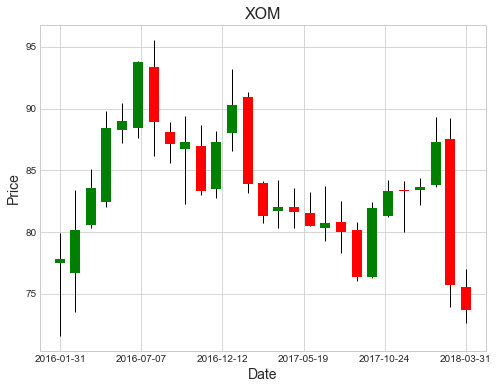

In [9]:
plt.style.use('seaborn-whitegrid')
up = M_XOM[M_XOM['open']<M_XOM['close']]
down = M_XOM[M_XOM['open']>=M_XOM['close']]
ticks = pd.date_range(start='2016-01-31',end='2018-03-31',periods=6)

fig,ax = plt.subplots(figsize=(8,6))
ax.errorbar(M_XOM.index.get_level_values(0),M_XOM.high,yerr=[M_XOM.high-M_XOM.low,[0]*len(M_XOM)],fmt='none',linewidth=1,color='k')
ax.errorbar(up.index.get_level_values(0),up.open,yerr=[up.open-up.close,[0]*len(up)],fmt='none',linewidth=10,color='g')
ax.errorbar(down.index.get_level_values(0),down.open,yerr=[down.open-down.close,[0]*len(down)],fmt='none',linewidth=10,color='r')
ax.set_xticks(ticks)
ax.set_xticklabels(map(lambda x:x[:10],map(str,ticks)))
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Price',fontsize=14)
ax.set_title('XOM',fontsize=16)


Text(0.5, 1.0, 'AMZN')

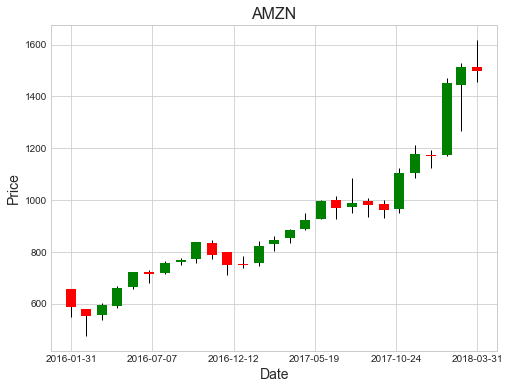

In [10]:
plt.style.use('seaborn-whitegrid')
up = M_AMZN[M_AMZN['open']<M_AMZN['close']]
down = M_AMZN[M_AMZN['open']>=M_AMZN['close']]
ticks = pd.date_range(start='2016-01-31',end='2018-03-31',periods=6)

fig,ax = plt.subplots(figsize=(8,6))
ax.errorbar(M_AMZN.index.get_level_values(0),M_AMZN.high,yerr=[M_AMZN.high-M_AMZN.low,[0]*len(M_AMZN)],fmt='none',linewidth=1,color='k')
ax.errorbar(up.index.get_level_values(0),up.open,yerr=[up.open-up.close,[0]*len(up)],fmt='none',linewidth=10,color='g')
ax.errorbar(down.index.get_level_values(0),down.open,yerr=[down.open-down.close,[0]*len(down)],fmt='none',linewidth=10,color='r')
ax.set_xticks(ticks)
ax.set_xticklabels(map(lambda x:x[:10],map(str,ticks)))
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Price',fontsize=14)
ax.set_title('AMZN',fontsize=16)


### Part II 

Generate the daily return time series for each stock. Make sure the two time series are **synchronous**.

In [11]:
XOM.insert(6,'return',XOM['adj_close'].pct_change())
AMZN.insert(6,'return',AMZN['adj_close'].pct_change())

In [12]:
XOM.head()

,ticker,open,high,low,close,adj_close,return
date,,,,,,,
2016-01-04,XOM,77.50,77.94,76.4550,77.46,72.070110,NaN
2016-01-05,XOM,77.19,78.14,76.9223,78.12,72.684185,0.008521
2016-01-06,XOM,76.64,77.64,76.5900,77.47,72.079414,-0.008321
2016-01-07,XOM,76.06,77.99,75.9000,76.23,70.925697,-0.016006
2016-01-08,XOM,76.35,76.65,74.5000,74.69,69.492854,-0.020202


In [13]:
AMZN.head()

,ticker,open,high,low,close,adj_close,return
date,,,,,,,
2016-01-04,AMZN,656.29,657.715,627.51,636.99,636.99,NaN
2016-01-05,AMZN,646.86,646.910,627.65,633.79,633.79,-0.005024
2016-01-06,AMZN,622.00,639.790,620.31,632.65,632.65,-0.001799
2016-01-07,AMZN,621.80,630.000,605.21,607.94,607.94,-0.039058
2016-01-08,AMZN,619.66,624.140,606.00,607.05,607.05,-0.001464


Use scatter plot to plot daily return of AMZN against that of XOM

Text(0, 0.5, 'AMZN')

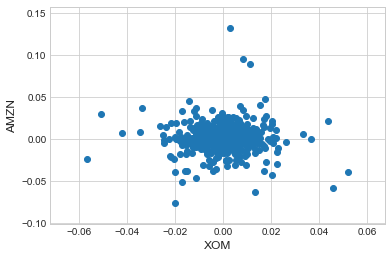

In [14]:
plt.scatter(XOM['return'][2:],AMZN['return'][1:])
plt.xlabel('XOM',fontsize=12)
plt.ylabel('AMZN',fontsize=12)

Calculate the return correlation between them 

In [15]:
np.corrcoef(AMZN['return'][1:],XOM['return'][2:])

array([[1.        , 0.00668238],
       [0.00668238, 1.        ]])

Use least-squares method to find the regression coefficients $\beta, a$: $r_{AMZN} = \beta r_{XOM} + a$


In [16]:
#use lstsq to fit the data
X = np.vstack([np.ones(len(XOM)-2),XOM['return'][2:]]).T
a, b  = np.linalg.lstsq(X,AMZN['return'][1:])[0]
a, b

C:\Users\ryans\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0016603926787196726, 0.010319828969940537)

Text(0, 0.5, 'AMZN')

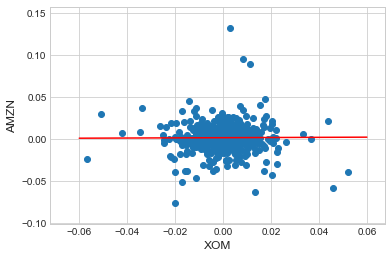

In [129]:
x = np.linspace(-0.06,0.06,100)

plt.scatter(XOM['return'][1:],AMZN['return'])
plt.plot(x,a+b*x,color='r')
plt.xlabel('XOM',fontsize=12)
plt.ylabel('AMZN',fontsize=12)

Compute the residual return series of AMZN

In [19]:
residual=[]
for i in range(2,len(AMZN['return'])):
    residual.append(AMZN['return'][i] - b*XOM['return'][i] - a)

Do a histrogram plot of the residual returns of AMZN

(array([ 1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  3.,  5.,  4.,  5.,  8.,
         8., 21., 24., 59., 79., 96., 64., 60., 48., 29., 11., 14.,  2.,
         4.,  4.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.07787546, -0.07370855, -0.06954164, -0.06537474, -0.06120783,
        -0.05704092, -0.05287402, -0.04870711, -0.0445402 , -0.0403733 ,
        -0.03620639, -0.03203948, -0.02787258, -0.02370567, -0.01953876,
        -0.01537186, -0.01120495, -0.00703804, -0.00287114,  0.00129577,
         0.00546268,  0.00962958,  0.01379649,  0.0179634 ,  0.0221303 ,
         0.02629721,  0.03046411,  0.03463102,  0.03879793,  0.04296483,
         0.04713174,  0.05129865,  0.05546555,  0.05963246,  0.06379937,
         0.06796627,  0.07213318,  0.07630009,  0.08046699,  0.0846339 ,
         0.08880081,  0.09296771,  0.09713462,  0.10130153,  0.10546843,
         0.10963534,  0.11380225,  0.11796915,  0.12213606,

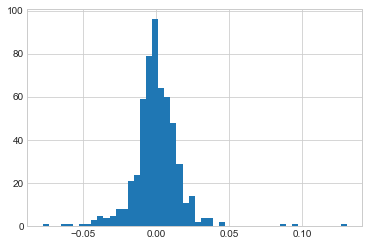

In [20]:
plt.hist(residual,bins=50)

Calculate the (mean, std) of the residual returns of AMZN. These parameters will tell you the normal distribution density function to use to fit the residual distribution

In [21]:
mu = np.mean(residual)
sigma = np.std(residual)
mu, sigma

(1.1903552470932788e-05, 0.016293688720391858)

Plot the "theoretical" normal density distribution curve together with the historgram (set option density=True). How "normal" is the residual distribution?

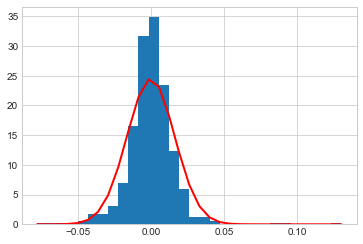

In [22]:
count, bins, ignored = plt.hist(residual, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
plt.show()